In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from Chemometrics.basic import psave,pload
%matplotlib inline

In [136]:
df = pd.read_excel('../地沟油/data/清华大学分析测试中心IR数据/检测样品信息.xlsx',sheetname='A')
df = df[df['编号'].map(lambda x:x.startswith('Y'))]
df.set_index('编号',inplace=True)
df.head()
c = df['地沟油含量']

In [137]:
import glob

In [138]:
files = glob.glob('C:/Users/litao/Documents/地沟油/data/清华大学分析测试中心IR数据/csv/*.csv')

In [139]:
observations = []
for f in files:
    with open(f) as f:
        observations.append(pd.read_csv(f,header=1,index_col=0))
observations = pd.concat(observations,axis=1)
# labels
import re
fh = lambda x:re.search('(?<=\\\)(Y.*)?(?=\.csv$)',x)[0]
fh1 = lambda x:re.search('(?<=\\\)Y-[0-9]{3}',x)[0]
label_num = list(map(fh,files))
labels = list(map(fh1,files))
observations.columns = labels
observations = observations.T

In [140]:
# 地沟油浓度 及描述
cs = c[observations.index]
descriptions = df.loc[observations.index,:]

In [143]:
descriptions.shape

(138, 7)

In [144]:
data = {'IR':observations,'descriptions':descriptions}
psave(data,'地沟油红外数据及标签.p')
observations.to_excel('地沟油IR.xlsx')
descriptions.to_excel('地沟油IR_标签.xlsx')

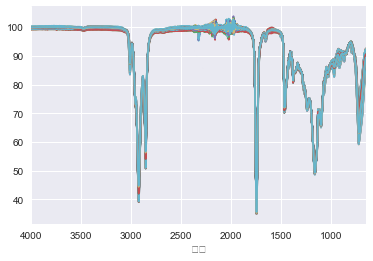

In [145]:
observations.T.plot(legend=False)
plt.xlabel('波数')

In [114]:
# plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)